In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import datetime
import time
from time import strftime, gmtime


# **Data Pre-Processing**

> 




In [0]:
df_flights = pd.read_csv("drive/My Drive/Data Mining/flights.csv", low_memory=False)

In [4]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# df_flights.count()


In [0]:
# df_flights.dtypes

In [0]:
def conv_time(time_val):
    if pd.isnull(time_val):
        return np.nan
    else:
            # replace 24:00 o'clock with 00:00 o'clock:
        if time_val == 2400: time_val = 0
            # creating a 4 digit value out of input value:
        time_val = "{0:04d}".format(int(time_val))
            # creating a time datatype out of input value: 
        time_formatted = datetime.time(int(time_val[0:2]), int(time_val[2:4]))
    return time_formatted

In [0]:
### # convert ARRIVAL_TIME to datetime time format and write it back into df field ARRIVAL_TIME:
df_flights['ARRIVAL_TIME'] = df_flights['ARRIVAL_TIME'].apply(conv_time)
df_flights['DEPARTURE_TIME'] = df_flights['DEPARTURE_TIME'].apply(conv_time)
df_flights['SCHEDULED_DEPARTURE'] = df_flights['SCHEDULED_DEPARTURE'].apply(conv_time)
df_flights['WHEELS_OFF'] = df_flights['WHEELS_OFF'].apply(conv_time)
df_flights['WHEELS_ON'] = df_flights['WHEELS_ON'].apply(conv_time)
df_flights['SCHEDULED_ARRIVAL'] = df_flights['SCHEDULED_ARRIVAL'].apply(conv_time)

In [8]:
df_flights[['YEAR','MONTH','DAY','SCHEDULED_DEPARTURE','DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME','WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL'
            ,'ARRIVAL_TIME','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY']].dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
SCHEDULED_DEPARTURE     object
DEPARTURE_TIME          object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF              object
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
WHEELS_ON               object
TAXI_IN                float64
SCHEDULED_ARRIVAL       object
ARRIVAL_TIME            object
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
dtype: object

In [0]:
# null value analysing function.
# gives some infos on columns types and number of null values:
def nullAnalysis(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
    return tab_info

In [0]:
# nullAnalysis(df_flights)

In [11]:
# show selected columns where AIRLINE_DELAY isnot null
df_flights.loc[df_flights['AIRLINE_DELAY'].notnull(), ['AIRLINE_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].head()

,AIRLINE_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,0.0,25.0,0.0,0.0,0.0,0.0
30,0.0,43.0,0.0,0.0,0.0,0.0
35,15.0,0.0,0.0,15.0,0.0,0.0
50,0.0,20.0,0.0,0.0,0.0,0.0
52,85.0,0.0,0.0,85.0,0.0,0.0


In [0]:
df_flights['AIRLINE_DELAY'] = df_flights['AIRLINE_DELAY'].fillna(0)
df_flights['AIR_SYSTEM_DELAY'] = df_flights['AIR_SYSTEM_DELAY'].fillna(0)
df_flights['SECURITY_DELAY'] = df_flights['SECURITY_DELAY'].fillna(0)
df_flights['LATE_AIRCRAFT_DELAY'] = df_flights['LATE_AIRCRAFT_DELAY'].fillna(0)
df_flights['WEATHER_DELAY'] = df_flights['WEATHER_DELAY'].fillna(0)

In [0]:
# nullAnalysis(df_flights)

In [14]:
# group by CANCELLATION_REASON to see the ration
df_flights['CANCELLATION_REASON'].value_counts()



B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

In [0]:
# -------------------------------------
# converting categoric value to numeric
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 1
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 2
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 3
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 4

# -----------------------------------
# converting NaN data to numeric zero
df_flights['CANCELLATION_REASON'] = df_flights['CANCELLATION_REASON'].fillna(0)

In [0]:
# nullAnalysis(df_flights)

In [0]:
# drop the last 1% of missing data rows.
df_flights = df_flights.dropna(axis=0)

In [0]:
# df_flights['ARRIVAL_TIME'].head()

In [19]:
df_flights['ORIGIN_AIRPORT'].value_counts()

ATL      343506
ORD      276554
DFW      232647
DEN      193402
LAX      192003
          ...  
13541        11
14222         9
10165         9
13502         6
11503         4
Name: ORIGIN_AIRPORT, Length: 628, dtype: int64

In [0]:
# Only using data from January
from sklearn.utils import shuffle

df_flights_jan = df_flights.loc[(df_flights.loc[:,'YEAR'] == 2015 ) & (df_flights.loc[:,'MONTH'] == 1 )]
df_flights_jan = shuffle(df_flights_jan)[:10000]


In [0]:

feature_list = [
    'YEAR'
    ,'MONTH'
    ,'DAY'
    , 'DAY_OF_WEEK'
    ,'AIRLINE'
    , 'ORIGIN_AIRPORT'
    , 'DESTINATION_AIRPORT'
    ,'LATE_AIRCRAFT_DELAY'
    ,'AIRLINE_DELAY'
    ,'AIR_SYSTEM_DELAY'
    ,'WEATHER_DELAY'
    ,'ELAPSED_TIME'
    ,'DEPARTURE_DELAY'
    ,'SCHEDULED_TIME'
    ,'AIR_TIME'
    ,'DISTANCE'
    ,'TAXI_IN'
    ,'TAXI_OUT'
    ,'SECURITY_DELAY'
]

X = df_flights_jan[feature_list]

In [22]:
# Label encoding of AIRLINE and write this back to df
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()

# Converting "category" airline to integer values
X.iloc[:,feature_list.index('AIRLINE')] = labelenc.fit_transform(X.iloc[:,feature_list.index('AIRLINE')])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [23]:
# Label encoding of ORIGIN_AIRPORT and write this back to df
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()

# Converting "category" airline to integer values
X.iloc[:,feature_list.index('ORIGIN_AIRPORT')] = labelenc.fit_transform(X.iloc[:,feature_list.index('ORIGIN_AIRPORT')])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
# Label encoding of DESTINATION_AIRPORT and write this back to df
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()

# Converting "category" airline to integer values
X.iloc[:,feature_list.index('DESTINATION_AIRPORT')] = labelenc.fit_transform(X.iloc[:,feature_list.index('DESTINATION_AIRPORT')])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
X = np.array(X)
y = df_flights_jan.ARRIVAL_DELAY
y = np.array(y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [27]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (6500, 19)
Training Labels Shape: (6500,)
Testing Features Shape: (3500, 19)
Testing Labels Shape: (3500,)


## **Decision Tree Regressor**

In [0]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [0]:
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
y_pred = regr_1.predict(X_test)

In [0]:
df_pred=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_pred.head()

,Actual,Predicted
0,-1.0,3.196721
1,-16.0,-11.800839
2,-12.0,-7.926421
3,9.0,-11.800839
4,6.0,-11.800839


In [0]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.1455806554303205
Mean Squared Error: 112.44655595374878
Root Mean Squared Error: 10.604082042013292


In [0]:
import seaborn as sns

#maschine learning libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC

import datetime
import time
from time import strftime, gmtime

In [0]:
from sklearn.model_selection import cross_val_score

print("----------------- TRAINING ------------------------")
print("r-squared score: ",regr_1.score(X_train, y_train))
print("------------------- TEST --------------------------")
print("r-squared score: ", regr_1.score(X_test, y_test))
#score = cross_val_score(regressor, X_test, y_test)
# score = regr_1.score(X_test, y_test)
# print("Score")
# print(score)


----------------- TRAINING ------------------------
r-squared score:  0.9611268699167007
------------------- TEST --------------------------
r-squared score:  0.9163526429928677


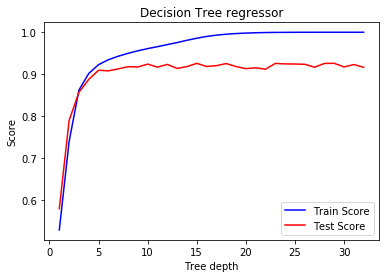

In [0]:
#vary max depth of the decision tree
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for i in max_depths:
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    
    # Add R^2 score to previous train results
    score = dt.score(X_train, y_train)
    train_results.append(score)
#     print(score)
    y_pred = dt.predict(X_test)
    # Add R^2 score to previous test results
    score = dt.score(X_test, y_test)
    test_results.append(score)
#     print(score)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(max_depths, train_results, 'b', label='Train Score')
line2 = plt.plot(max_depths, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.title('Decision Tree regressor')
plt.show()

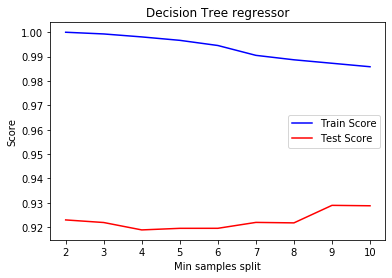

In [0]:
#vary min samples split
samples = np.linspace(2, 10, 9, endpoint=True)
train_results = []
test_results = []
for i in samples:
  dt = DecisionTreeRegressor(min_samples_split=int(i))
  dt.fit(X_train, y_train)
    # train_pred = dt.predict(X_train)
    
    # Add R^2 score to previous train results
  score = dt.score(X_train, y_train)
  train_results.append(score)
#     print(score)
    # y_pred = dt.predict(X_test)
    # Add R^2 score to previous test results
  score = dt.score(X_test, y_test)
  test_results.append(score)
#     print(score)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(samples, train_results, 'b', label='Train Score')
line2 = plt.plot(samples, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Min samples split')
plt.title('Decision Tree regressor')
plt.show()

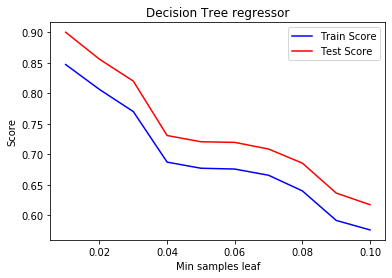

In [0]:
#vary max samples leaf
samples = np.linspace(0.01, 0.1, 10, endpoint=True)
train_results = []
test_results = []
for i in samples:
  dt = DecisionTreeRegressor(min_samples_leaf=i)
  dt.fit(X_train, y_train)
    # train_pred = dt.predict(X_train)
    
    # Add R^2 score to previous train results
  score = dt.score(X_train, y_train)
  train_results.append(score)
#     print(score)
    # y_pred = dt.predict(X_test)
    # Add R^2 score to previous test results
  score = dt.score(X_test, y_test)
  test_results.append(score)
#     print(score)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(samples, train_results, 'b', label='Train Score')
line2 = plt.plot(samples, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Min samples leaf')
plt.title('Decision Tree regressor')
plt.show()

In [0]:
dt = DecisionTreeRegressor(random_state=42)
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

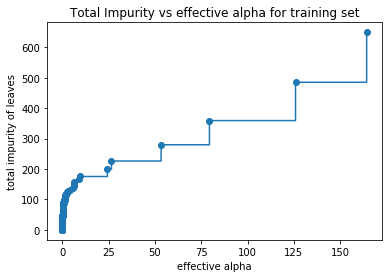

In [0]:
#pruning of a dt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [0]:
dtrees = []
for i in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=i)
    dt.fit(X_train, y_train)
    dtrees.append(dt)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(dtrees[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 731.7912228458804


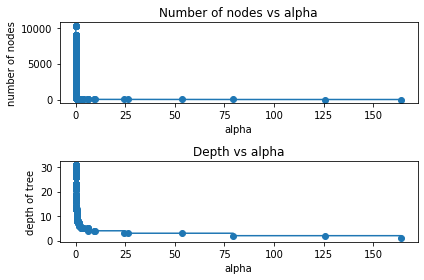

In [0]:
dtrees = dtrees[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt.tree_.node_count for dt in dtrees]
depth = [dt.tree_.max_depth for dt in dtrees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

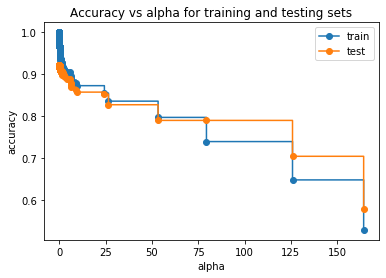

In [0]:
#plot of accuracy vs alpha
train_scores = [dt.score(X_train, y_train) for dt in dtrees]
test_scores = [dt.score(X_test, y_test) for dt in dtrees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
#finding the best fit model
hyper_params = { 'max_depth': [5, 10, 20, 30, 50, 75], 'min_samples_split' : [2, 4, 6, 8], 'min_samples_leaf' : [0.5, 0.75, 1], 'max_features': [0.5, 0.7, 0.8, 1]}

gsc_dt= GridSearchCV(estimator=DecisionTreeRegressor(),
                     param_grid = hyper_params, 
                     cv = 3,
                     scoring='r2',
                     verbose = 0,
                     n_jobs=-1)
gsc_dt.fit(X_train, y_train)
print('Best parameters :', gsc_dt.best_params_)


Best parameters : {'max_depth': 30, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [0]:

dt = DecisionTreeRegressor(max_depth = gsc_dt.best_params_['max_depth'], min_samples_split = gsc_dt.best_params_['min_samples_split'], min_samples_leaf = gsc_dt.best_params_['min_samples_leaf'], max_features = gsc_dt.best_params_['max_features'])
dt.fit(X_train, y_train)
print('Score :', dt.score(X_test, y_test))

Score : 0.9033858348878124


# **Random Forest Regressor**

In [0]:
forest_model = RandomForestRegressor(n_estimators = 10, random_state=42)
forest_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
flightdelay_pred= forest_model.predict(X_test)


In [0]:
df_pred=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_pred.head()

,Actual,Predicted
0,-1.0,-3.0
1,-16.0,-11.0
2,-12.0,-12.0
3,9.0,-7.0
4,6.0,-11.0


In [0]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.700857142857143
Mean Squared Error: 111.96314285714286
Root Mean Squared Error: 10.581263764652258


In [0]:
print("----------------- TRAINING ------------------------")
print("r-squared score: ",forest_model.score(X_train, y_train))
print("------------------- TEST --------------------------")
print("r-squared score: ", forest_model.score(X_test, y_test))

----------------- TRAINING ------------------------
r-squared score:  0.9881503644760703
------------------- TEST --------------------------
r-squared score:  0.9609853355990065


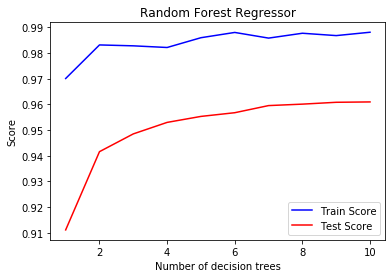

In [0]:
#vary numer of decision trees
n_trees = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for i in n_trees:
    rf = RandomForestRegressor(n_estimators = int(i), random_state=42)
    rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)   
    # Add R^2 score to previous train results
    score = rf.score(X_train, y_train)
#     print(score)
    train_results.append(score)  
#     y_pred = rf.predict(X_test)
    # Add R^2 score to previous test results
    score = rf.score(X_test, y_test)
#     print(score)
    test_results.append(score)
    
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(n_trees, train_results, 'b', label='Train Score')
line2 = plt.plot(n_trees, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Number of decision trees')
plt.title('Random Forest Regressor')
plt.show()

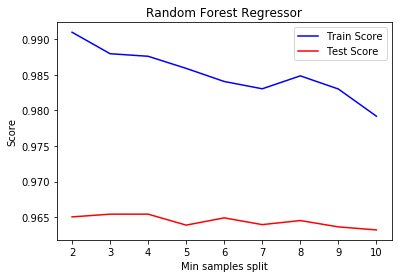

In [0]:
#vary min samples split
min_samples_splits = np.linspace(2, 10, 9, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
  rf = RandomForestRegressor(min_samples_split=int(min_samples_split))
  rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
    
  # Add R^2 score to previous train results
  score = rf.score(X_train, y_train)
#     print(score)
  train_results.append(score)
    
#     y_pred = rf.predict(X_test)
    # Add R^2 score to previous test results
  score = rf.score(X_test, y_test)
#     print(score)
  test_results.append(score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train Score')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test Score')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.legend()
plt.ylabel('Score')
plt.xlabel('Min samples split')
plt.title('Random Forest Regressor')
plt.show()


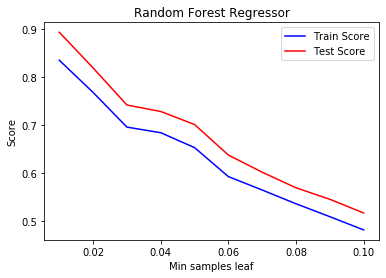

In [0]:
#vary min samples leaf
min_samples_leafs = np.linspace(0.01, 0.1, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
  rf = RandomForestRegressor(min_samples_leaf=min_samples_leaf)
  rf.fit(X_train, y_train)
#     train_pred = rf.predict(X_train)
    
  # Add R^2 score to previous train results
  score = rf.score(X_train, y_train)
#     print(score)
  train_results.append(score)
    
#     y_pred = rf.predict(X_test)
    # Add R^2 score to previous test results
  score = rf.score(X_test, y_test)
#     print(score)
  test_results.append(score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train Score')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test Score')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.legend()
plt.ylabel('Score')
plt.xlabel('Min samples leaf')
plt.title('Random Forest Regressor')
plt.show()

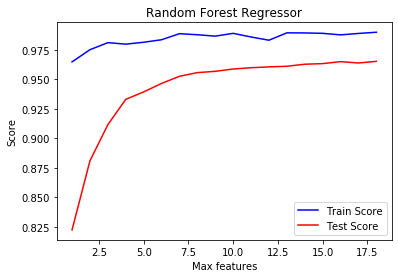

In [0]:
# vary max features
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
  rf = RandomForestRegressor(max_features=max_feature)
  rf.fit(X_train, y_train)
  # Add R^2 score to previous train results
  score = rf.score(X_train, y_train)
  train_results.append(score)
    # Add R^2 score to previous test results
  score = rf.score(X_test, y_test)
  test_results.append(score)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train Score')
line2, = plt.plot(max_features, test_results, 'r', label='Test Score')
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.legend()
plt.ylabel('Score')
plt.xlabel('Max features')
plt.title('Random Forest Regressor')
plt.show()

In [0]:
#finding best fit model
hyper_params = { 'n_estimators': [5, 10, 20, 50, 75], 'min_samples_split' : [2, 5, 8, 12], 'min_samples_leaf' : [0.01, 0.05, 0.1, 0.2], 'max_features': [0.5, 0.7, 0.8, 1]}

gsc_dt= GridSearchCV(estimator=RandomForestRegressor(),
                     param_grid = hyper_params, 
                     cv = 3,
                     scoring='r2',
                     verbose = 0,
                     n_jobs=-1)
gsc_dt.fit(X_train, y_train)
print(gsc_dt.best_params_)

{'max_features': 0.8, 'min_samples_leaf': 0.01, 'min_samples_split': 8, 'n_estimators': 20}


In [0]:
#predicting accuracy of the best fit model
rf = RandomForestRegressor(n_estimators = gsc_dt.best_params_['n_estimators'], min_samples_split = gsc_dt.best_params_['min_samples_split'], min_samples_leaf = gsc_dt.best_params_['min_samples_leaf'], max_features = gsc_dt.best_params_['max_features'])
rf.fit(X_train, y_train)
print('Score :', rf.score(X_test, y_test))

Score : 0.8798303644467997


# **Bagging regressor**

In [0]:
from sklearn.ensemble import BaggingRegressor

In [0]:

ensemble = BaggingRegressor(base_estimator = DecisionTreeRegressor(), max_features = 12)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print(ensemble.score(X_test, y_test))


0.9417064941909946


In [0]:
df_pred=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_pred.head()

,Actual,Predicted
0,-1.0,-1.3
1,-16.0,-12.0
2,-12.0,-7.3
3,9.0,-3.6
4,6.0,-5.1


In [0]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.348628571428572
Mean Squared Error: 78.36355142857144
Root Mean Squared Error: 8.852318985925182


In [0]:
# from sklearn.model_selection import cross_val_score
# print(ensemble.score(X_test, y_train))
print("----------------- TRAINING ------------------------")
print("r-squared score: ", ensemble.score(X_train, y_train))
print("------------------- TEST --------------------------")
print("r-squared score: ", ensemble.score(X_test, y_test))
#score = cross_val_score(regressor, X_test, y_test)
# score = regr_1.score(X_test, y_test)
# print("Score")
# print(score)


----------------- TRAINING ------------------------
r-squared score:  0.9852904556149269
------------------- TEST --------------------------
r-squared score:  0.9417064941909946


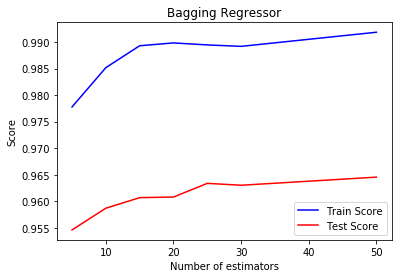

In [0]:
#grpah of bagging by varying number of estimators
numbers = [5, 10, 15, 20, 25, 30, 50]
train_results = []
test_results = []
for i in numbers:
  br = BaggingRegressor(n_estimators = i)
  br.fit(X_train, y_train)
#     train_pred = br.predict(X_train)   
    # Add R^2 score to previous train results
  score = br.score(X_train, y_train)
#     print(score)
  train_results.append(score)  
#     y_pred = br.predict(X_test)
    # Add R^2 score to previous test results
  score = br.score(X_test, y_test)
#     print(score)
  test_results.append(score)
    
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(numbers, train_results, 'b', label='Train Score')
line2 = plt.plot(numbers, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Number of estimators')
plt.title('Bagging Regressor')
plt.show()

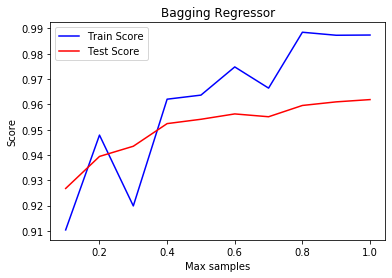

In [0]:
#grpah of bagging by varying max samples
samples = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for i in samples:
  br = BaggingRegressor(max_samples = i)
  br.fit(X_train, y_train)
#     train_pred = br.predict(X_train)   
    # Add R^2 score to previous train results
  score = br.score(X_train, y_train)
#     print(score)
  train_results.append(score)  
#     y_pred = br.predict(X_test)
    # Add R^2 score to previous test results
  score = br.score(X_test, y_test)
#     print(score)
  test_results.append(score)
    
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(samples, train_results, 'b', label='Train Score')
line2 = plt.plot(samples
                 , test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Max samples')
plt.title('Bagging Regressor')
plt.show()

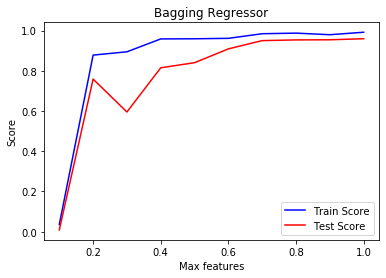

In [0]:
#grpah of bagging by varying max features
features = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for i in features:
  br = BaggingRegressor(max_features = i)
  br.fit(X_train, y_train)
#     train_pred = br.predict(X_train)   
    # Add R^2 score to previous train results
  score = br.score(X_train, y_train)
#     print(score)
  train_results.append(score)  
#     y_pred = br.predict(X_test)
    # Add R^2 score to previous test results
  score = br.score(X_test, y_test)
#     print(score)
  test_results.append(score)
    
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(features, train_results, 'b', label='Train Score')
line2 = plt.plot(features
                 , test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Max features')
plt.title('Bagging Regressor')
plt.show()

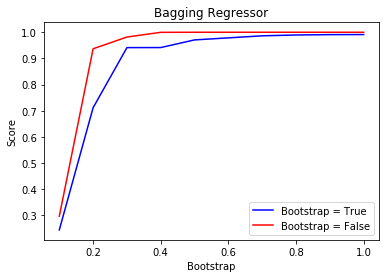

In [0]:
#grpah of bagging by varying bootstrap
features = np.linspace(0.1, 1.0, 10, endpoint=True)
true_results = []
false_results = []
for i in features:
  br1 = BaggingRegressor(max_features = i, bootstrap = True)
  br2 = BaggingRegressor(max_features = i, bootstrap = False)
  br1.fit(X_test, y_test)
  br2.fit(X_test, y_test)
  score1 = br1.score(X_test, y_test)
  true_results.append(score1)
  score2 = br2.score(X_test, y_test)
  false_results.append(score2)
    
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(features, true_results, 'b', label='Bootstrap = True')
line2 = plt.plot(features
                 , false_results, 'r', label='Bootstrap = False')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Bootstrap')
plt.title('Bagging Regressor')
plt.show()

In [0]:
#finding best fit model
hyper_params = { 'n_estimators': [5, 10, 20, 50, 75], 'max_samples' : [0.2, 0.5, 0.75, 1],  'max_features': [0.5, 0.75, 1], 'bootstrap':[True, False]}

gsc_br= GridSearchCV(estimator=BaggingRegressor(),
                     param_grid = hyper_params, 
                     cv = 3,
                     scoring='r2',
                     verbose = 0,
                     n_jobs=-1)
gsc_br.fit(X_train, y_train)
print(gsc_br.best_params_)

{'bootstrap': False, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 50}


In [0]:
rf = RandomForestRegressor(n_estimators = gsc_dt.best_params_['n_estimators'],  max_features = gsc_dt.best_params_['max_features'])
rf.fit(X_train, y_train)
print('Score :', rf.score(X_test, y_test))

Score : 0.9608026654935791


In [0]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(tol=1, 
                   early_stopping=True)
ann.fit(X_train, y_train)
print("r-squared score: ", ann.score(X_test, y_test))

r-squared score:  0.948280607057785


# **KNN Regressor**

In [0]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
regr_2 = KNeighborsRegressor()
regr_2.fit(X_train, y_train)
y_pred = regr_2.predict(X_test)

In [29]:
df_pred=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_pred.head()

,Actual,Predicted
0,32.0,36.8
1,12.0,-4.0
2,0.0,-1.0
3,0.0,-14.2
4,-6.0,-11.6


In [30]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12.865257142857143
Mean Squared Error: 408.9594971428571
Root Mean Squared Error: 20.222747022668734


In [31]:

#predicting accuarcy
from sklearn.model_selection import cross_val_score

print("----------------- TRAINING ------------------------")
print("r-squared score: ",regr_2.score(X_train, y_train))
print("------------------- TEST --------------------------")
print("r-squared score: ", regr_2.score(X_test, y_test))
#score = cross_val_score(regressor, X_test, y_test)
# score = regr_1.score(X_test, y_test)
# print("Score")
# print(score)

----------------- TRAINING ------------------------
r-squared score:  0.826197833495121
------------------- TEST --------------------------
r-squared score:  0.7558356301062399


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


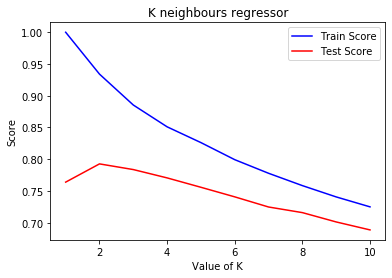

In [32]:
#graph of knn by varying k value
k_values = np.linspace(1, 10, 10, endpoint=True)
print(k_values)
train_results = []
test_results = []
for i in k_values:
  knnr = KNeighborsRegressor(n_neighbors=int(i))
  knnr.fit(X_train, y_train)

  score = knnr.score(X_train, y_train)
  train_results.append(score)

  score = knnr.score(X_test, y_test)
  test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(k_values, train_results, 'b', label='Train Score')
line2 = plt.plot(k_values, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Value of K')
plt.title('K neighbours regressor')
plt.show()

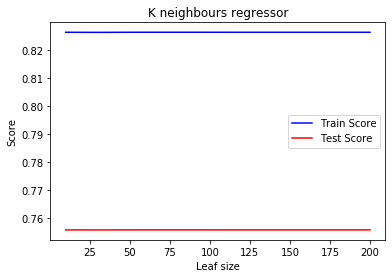

In [55]:
#graph of knn by varyingleaf sizes
leaf_sizes = np.linspace(10, 200, 10, endpoint=True)
# print(k_values)
train_results = []
test_results = []
for i in leaf_sizes:
  knnr = KNeighborsRegressor(leaf_size = int(i))
  knnr.fit(X_train, y_train)

  score = knnr.score(X_train, y_train)
  train_results.append(score)

  score = knnr.score(X_test, y_test)
  test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(leaf_sizes, train_results, 'b', label='Train Score')
line2 = plt.plot(leaf_sizes, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Leaf size')
plt.title('K neighbours regressor')
plt.show()

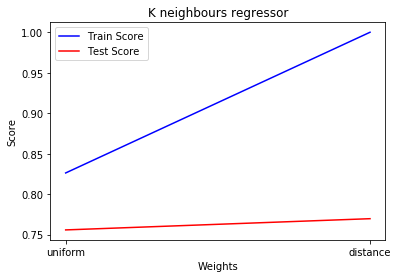

In [34]:
#graph of knn by varying the type of weights
weights = ['uniform', 'distance']
# print(k_values)
train_results = []
test_results = []
for i in weights:
  knnr = KNeighborsRegressor(weights = i)
  knnr.fit(X_train, y_train)

  score = knnr.score(X_train, y_train)
  train_results.append(score)

  score = knnr.score(X_test, y_test)
  test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(weights, train_results, 'b', label='Train Score')
line2 = plt.plot(weights, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Weights')
plt.title('K neighbours regressor')
plt.show()

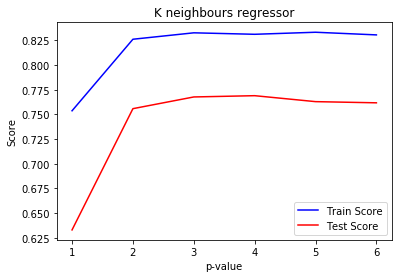

In [56]:
#graph of knn by varying p value
ps = [1, 2, 3, 4, 5 ,6]
# print(k_values)
train_results = []
test_results = []
for i in ps:
  knnr = KNeighborsRegressor(p = i)
  knnr.fit(X_train, y_train)

  score = knnr.score(X_train, y_train)
  train_results.append(score)

  score = knnr.score(X_test, y_test)
  test_results.append(score)

from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(ps, train_results, 'b', label='Train Score')
line2 = plt.plot(ps, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('p-value')
plt.title('K neighbours regressor')
plt.show()

In [37]:
# As per the above graph, we use k=3 parameter for K Neighbours Regressor.
# Scores for test data for k = 3 :
regr_2 = KNeighborsRegressor(n_neighbors=3)
regr_2.fit(X_train, y_train)
print("r-squared score: ", regr_2.score(X_test, y_test))

r-squared score:  0.7837423275756912


In [38]:
#finding best fit model
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(estimator=KNeighborsRegressor(),
                   param_grid={'n_neighbors': range(1,10), 
                               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                               'leaf_size' : [10, 20, 30, 40, 50]
                              },
                   cv=5,
                   scoring='r2',
                   verbose=0,
                   n_jobs=-1)
gsc.fit(X_train, y_train)
print(gsc.best_params_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'algorithm': 'ball_tree', 'leaf_size': 50, 'n_neighbors': 2}


In [39]:
#predicting best model accuracy
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors = gsc.best_params_['n_neighbors'],  
                          algorithm = gsc.best_params_['algorithm'],
                          leaf_size = gsc.best_params_['leaf_size']
                         )
knn.fit(X_train, y_train)
# print('Score :', knn.score(X_test, y_test))

print("----------------- TRAINING ------------------------")
print("r-squared score: ",knn.score(X_train, y_train))
print("------------------- TEST --------------------------")
print("r-squared score: ", knn.score(X_test, y_test))
#score = cross_val_score(regressor, X_test, y_test)
# score = regr_1.score(X_test, y_test)
# print("Score")

----------------- TRAINING ------------------------
r-squared score:  0.9340521882399118
------------------- TEST --------------------------
r-squared score:  0.7926658379350332


## **Artificial Neural Network Regressor**

In [40]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(tol=1, 
                   early_stopping=True)
ann.fit(X_train, y_train)
print("r-squared score: ", ann.score(X_test, y_test))

r-squared score:  0.9550997506053751


identity 0.9630294211136421
logistic 0.15149968048091167
tanh 0.20883116433916338
relu 0.9177239795042815


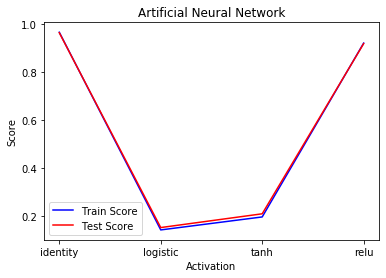

In [41]:
# graph for ann activations
activations = ['identity', 'logistic', 'tanh', 'relu']
# print(hidden_layer_sizes)
train_results = []
test_results = []
for i in activations:
  ann = MLPRegressor(activation = i,
                    tol = 1,
                    early_stopping=True, 
                    learning_rate='constant', 
                      
                    solver='adam')
  ann.fit(X_train, y_train)

  score = ann.score(X_train, y_train)
  train_results.append(score)

  score = ann.score(X_test, y_test)
  test_results.append(score)
  print(i, score)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(activations, train_results, 'b', label='Train Score')
line2 = plt.plot(activations, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Activation')
# plt.title('Decision Tree regressor')
plt.title('Artificial Neural Network')
plt.show()

[10, 50, 100, 150, 200, 500]
10 0.7415674517706248
50 0.9457777540880535
100 0.9461966449456874
150 0.9364386620831643
200 0.9345581441986568
500 0.9568099564535101


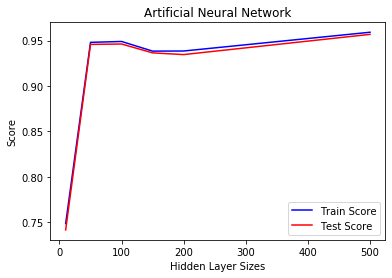

In [42]:
# graph for ann hidden_layer sizes
hidden_layer_sizes = [10, 50, 100, 150, 200, 500]
print(hidden_layer_sizes)
train_results = []
test_results = []
for i in hidden_layer_sizes:
  ann = MLPRegressor(hidden_layer_sizes = (int(i),),
                    tol = 1,
                    early_stopping=True, 
                    learning_rate='constant', 
                    activation='identity', 
                    solver='adam')
  ann.fit(X_train, y_train)

  score = ann.score(X_train, y_train)
  train_results.append(score)

  score = ann.score(X_test, y_test)
  test_results.append(score)
  print(i, score)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(hidden_layer_sizes, train_results, 'b', label='Train Score')
line2 = plt.plot(hidden_layer_sizes, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Hidden Layer Sizes')
# plt.title('Decision Tree regressor')
plt.title('Artificial Neural Network')
plt.show()

10.0 0.9999668752838746
62.10526315789474 0.9883680973287367
114.21052631578948 0.9574653366152673
166.31578947368422 0.945004797162052
218.42105263157896 0.8655891433131351
270.5263157894737 0.9215671802247132
322.63157894736844 0.954571616717535
374.7368421052632 0.9350081072454823
426.8421052631579 0.9414412555575349
478.94736842105266 0.5840558849891385
531.0526315789474 0.8744238583504496
583.1578947368421 0.9066514757625675
635.2631578947369 0.8746472164827446
687.3684210526317 0.8761512976625108
739.4736842105264 0.8876984238405632
791.578947368421 0.7838535049168556
843.6842105263158 0.840152113950215
895.7894736842106 0.937287619765709
947.8947368421053 0.9229470099129283
1000.0 0.9356051140516366


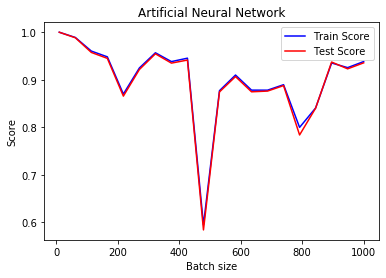

In [43]:
# graph for ann batch sizes
batch_sizes = np.linspace(10, 1000, 20, endpoint=True)
# print(hidden_layer_sizes)
train_results = []
test_results = []
for i in batch_sizes:
  ann = MLPRegressor(batch_size = int(i),
                      tol = 1,
                      early_stopping=True, 
                      learning_rate='constant', 
                      activation='identity', 
                      solver='adam')
  ann.fit(X_train, y_train)

  score = ann.score(X_train, y_train)
  train_results.append(score)

  score = ann.score(X_test, y_test)
  test_results.append(score)
  print(i, score)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(batch_sizes, train_results, 'b', label='Train Score')
line2 = plt.plot(batch_sizes, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Batch size')
# plt.title('Decision Tree regressor')
plt.title('Artificial Neural Network')
plt.show()

constant 0.9602833291662085
invscaling 0.9449907287536193
adaptive 0.9444980119790273


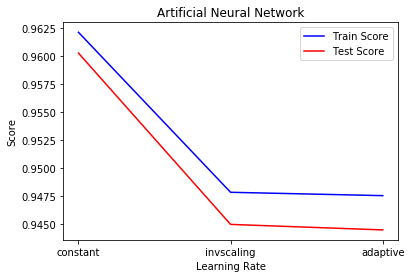

In [54]:
# graph for ann learning rates
learning_rates = ['constant', 'invscaling', 'adaptive']
# print(hidden_layer_sizes)
train_results = []
test_results = []
for i in learning_rates:
  ann = MLPRegressor(learning_rate = i,
                      tol = 1,
                      early_stopping=True,
                      activation='identity', 
                      solver='adam')
  ann.fit(X_train, y_train)

  score = ann.score(X_train, y_train)
  train_results.append(score)

  score = ann.score(X_test, y_test)
  test_results.append(score)
  print(i, score)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(learning_rates, train_results, 'b', label='Train Score')
line2 = plt.plot(learning_rates, test_results, 'r', label='Test Score')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Learning Rate')
# plt.title('Decision Tree regressor')
plt.title('Artificial Neural Network')
plt.show()

In [45]:
#finding best fit model
hyper_params = {'learning_rate' : ['constant', 'invscaling', 'adaptive'],
'activation' : ['identity', 'logistic', 'tanh', 'relu'], 
 'solver' : ['lbfgs', 'sgd', 'adam'], }
for key, val in hyper_params.items():
    gsc_ann = GridSearchCV(estimator=MLPRegressor(tol = 1, 
                                                 early_stopping= True),  
                           param_grid = { key : val },
                           cv = 3,
                           scoring='r2',
                           verbose = 0,
                           n_jobs=-1)
    gsc_ann.fit(X_train, y_train)
    print(gsc_ann.best_params_)

{'learning_rate': 'constant'}
{'activation': 'relu'}
{'solver': 'lbfgs'}


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [46]:
#predicting best model accuracy
from sklearn.model_selection import cross_val_score

ann = MLPRegressor(tol=1, 
                   early_stopping = True,
                   activation = 'relu',
                   solver = 'lbfgs')
ann.fit(X_train, y_train)
# print('Score :', knn.score(X_test, y_test))

print("----------------- TRAINING ------------------------")
print("r-squared score: ",ann.score(X_train, y_train))
print("------------------- TEST --------------------------")
print("r-squared score: ", ann.score(X_test, y_test))
#score = cross_val_score(regressor, X_test, y_test)
# score = regr_1.score(X_test, y_test)
# print("Score")

----------------- TRAINING ------------------------
r-squared score:  0.9990732854170168
------------------- TEST --------------------------
r-squared score:  0.999104854002725


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## **Naive Bayes Classifier**

In [48]:
df_flights_jan = df_flights.loc[(df_flights.loc[:,'YEAR'] == 2015 ) & (df_flights.loc[:,'MONTH'] == 1 )]
dfc = df_flights_jan.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
ma = int(max(dfc['ARRIVAL_DELAY'])) 
mi = int(min(dfc['ARRIVAL_DELAY']))
print(ma, mi)
# bins = list(range(mi, ma+60, 20))
# print(bins)
# sz = len(bins)
sz = 21
# print(sz)
labels = list(range(sz-1))
print(labels)
dfc['ARRIVAL_DELAY'] = pd.cut(dfc['ARRIVAL_DELAY'], bins=20, labels=labels)

1971 -82
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [49]:
Xc = dfc[feature_list]
labelenc = LabelEncoder()
Xc.iloc[:,feature_list.index('AIRLINE')] = labelenc.fit_transform(Xc.iloc[:,feature_list.index('ORIGIN_AIRPORT')])
labelenc = LabelEncoder()
Xc.iloc[:,feature_list.index('ORIGIN_AIRPORT')] = labelenc.fit_transform(Xc.iloc[:,feature_list.index('ORIGIN_AIRPORT')])
labelenc = LabelEncoder()
Xc.iloc[:,feature_list.index('DESTINATION_AIRPORT')] = labelenc.fit_transform(Xc.iloc[:,feature_list.index('DESTINATION_AIRPORT')])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
Xc = np.array(Xc)
yc = dfc.ARRIVAL_DELAY
yc = np.array(yc)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size = 0.35, random_state = 42)

In [52]:
#predicting model accuracy
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xc_train, yc_train)

print("----------------- TRAINING ------------------------")
print("r-squared score: ",gnb.score(Xc_train, yc_train))
print("------------------- TEST --------------------------")
print("r-squared score: ", gnb.score(Xc_test, yc_test))
#score = cross_val_score(regressor, X_test, y_test)
# score = regr_1.score(X_test, y_test)
# print("Score")
# print(gnb.score(Xc_test, yc_test))

----------------- TRAINING ------------------------
r-squared score:  0.9499424354839796
------------------- TEST --------------------------
r-squared score:  0.9499609265105811


# Comparision of models

<function matplotlib.pyplot.show(*args, **kw)>

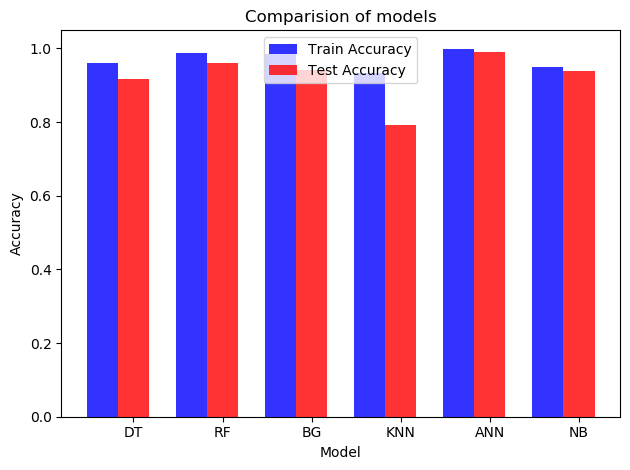

In [3]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 6
train = (0.961, 0.988, 0.985, 0.934, 0.9991, 0.95)
test = (0.916, 0.960, 0.941, 0.792, 0.990, 0.94)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, train, bar_width,
                 alpha=opacity, 
                 color='b',
                 label='Train Accuracy')

rects2 = plt.bar(index + bar_width, test, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Test Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparision of models')
plt.xticks(index + bar_width, ('DT', 'RF', 'BG', 'KNN', 'ANN','NB'))
plt.legend()

plt.tight_layout()
plt.savefig('nn.png')
plt.show

